<h1> Page-View Time Series Visualizer Analysis</h1>
<hr/>

<h2>Analyis Overview</h2>

The goal of this project is to vizualize time series data using a <b>line chart</b>, <b>bar chart</b>, and <b>box plots</b>. 

I will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the <b>freeCodeCamp.org forum</b> from <ins>2016-05-09 to 2019-12-03</ins>. 

The data visualizations will serve to understand the patterns in visits and identify yearly and monthly growth.

<h3><u>Tasks</u>:</h3>

* Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
* Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". 
    * The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". 
    * The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

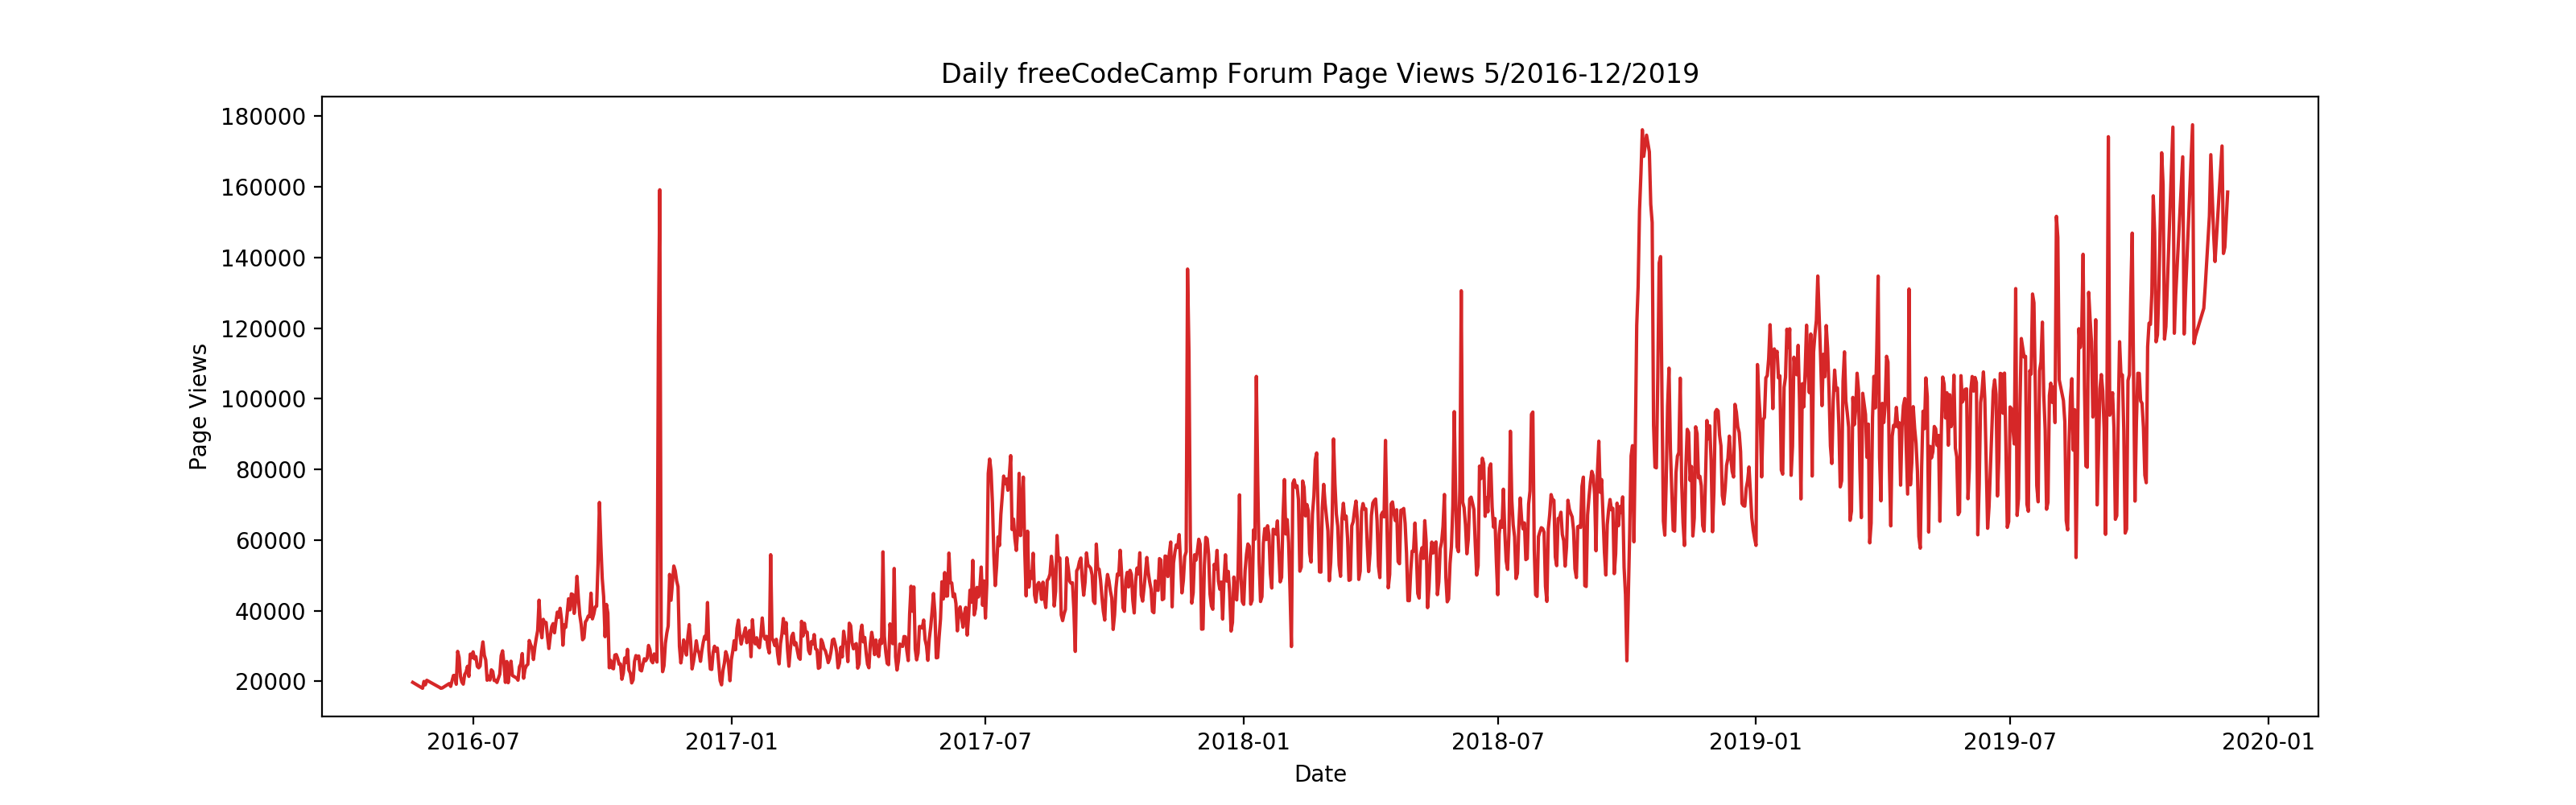   
    

* Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
    * It should show average daily page views for each month grouped by year. 
    * The legend should show month labels and have a title of "Months". 
    * On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

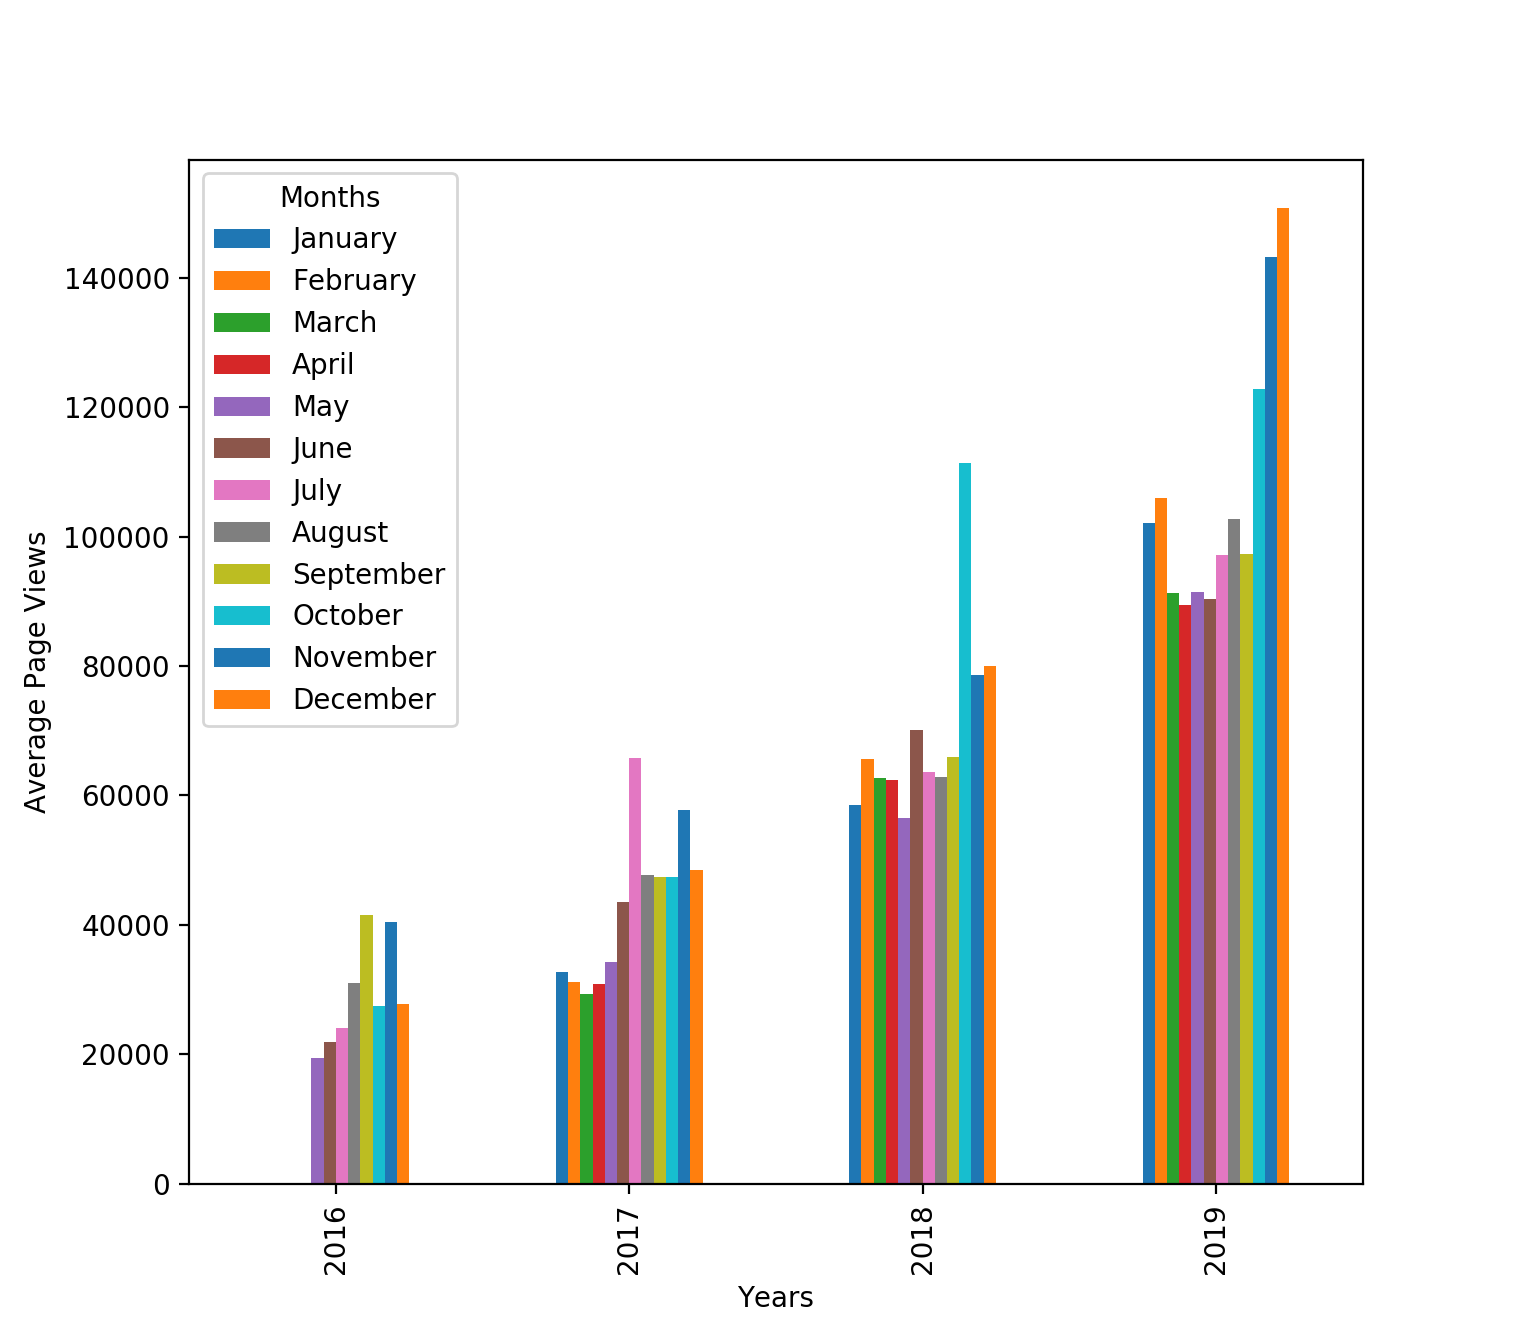

* Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". 
    * These box plots should show how the values are distributed within a given year or month and how it compares over time. 
    * The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". 
    * Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly. 
    
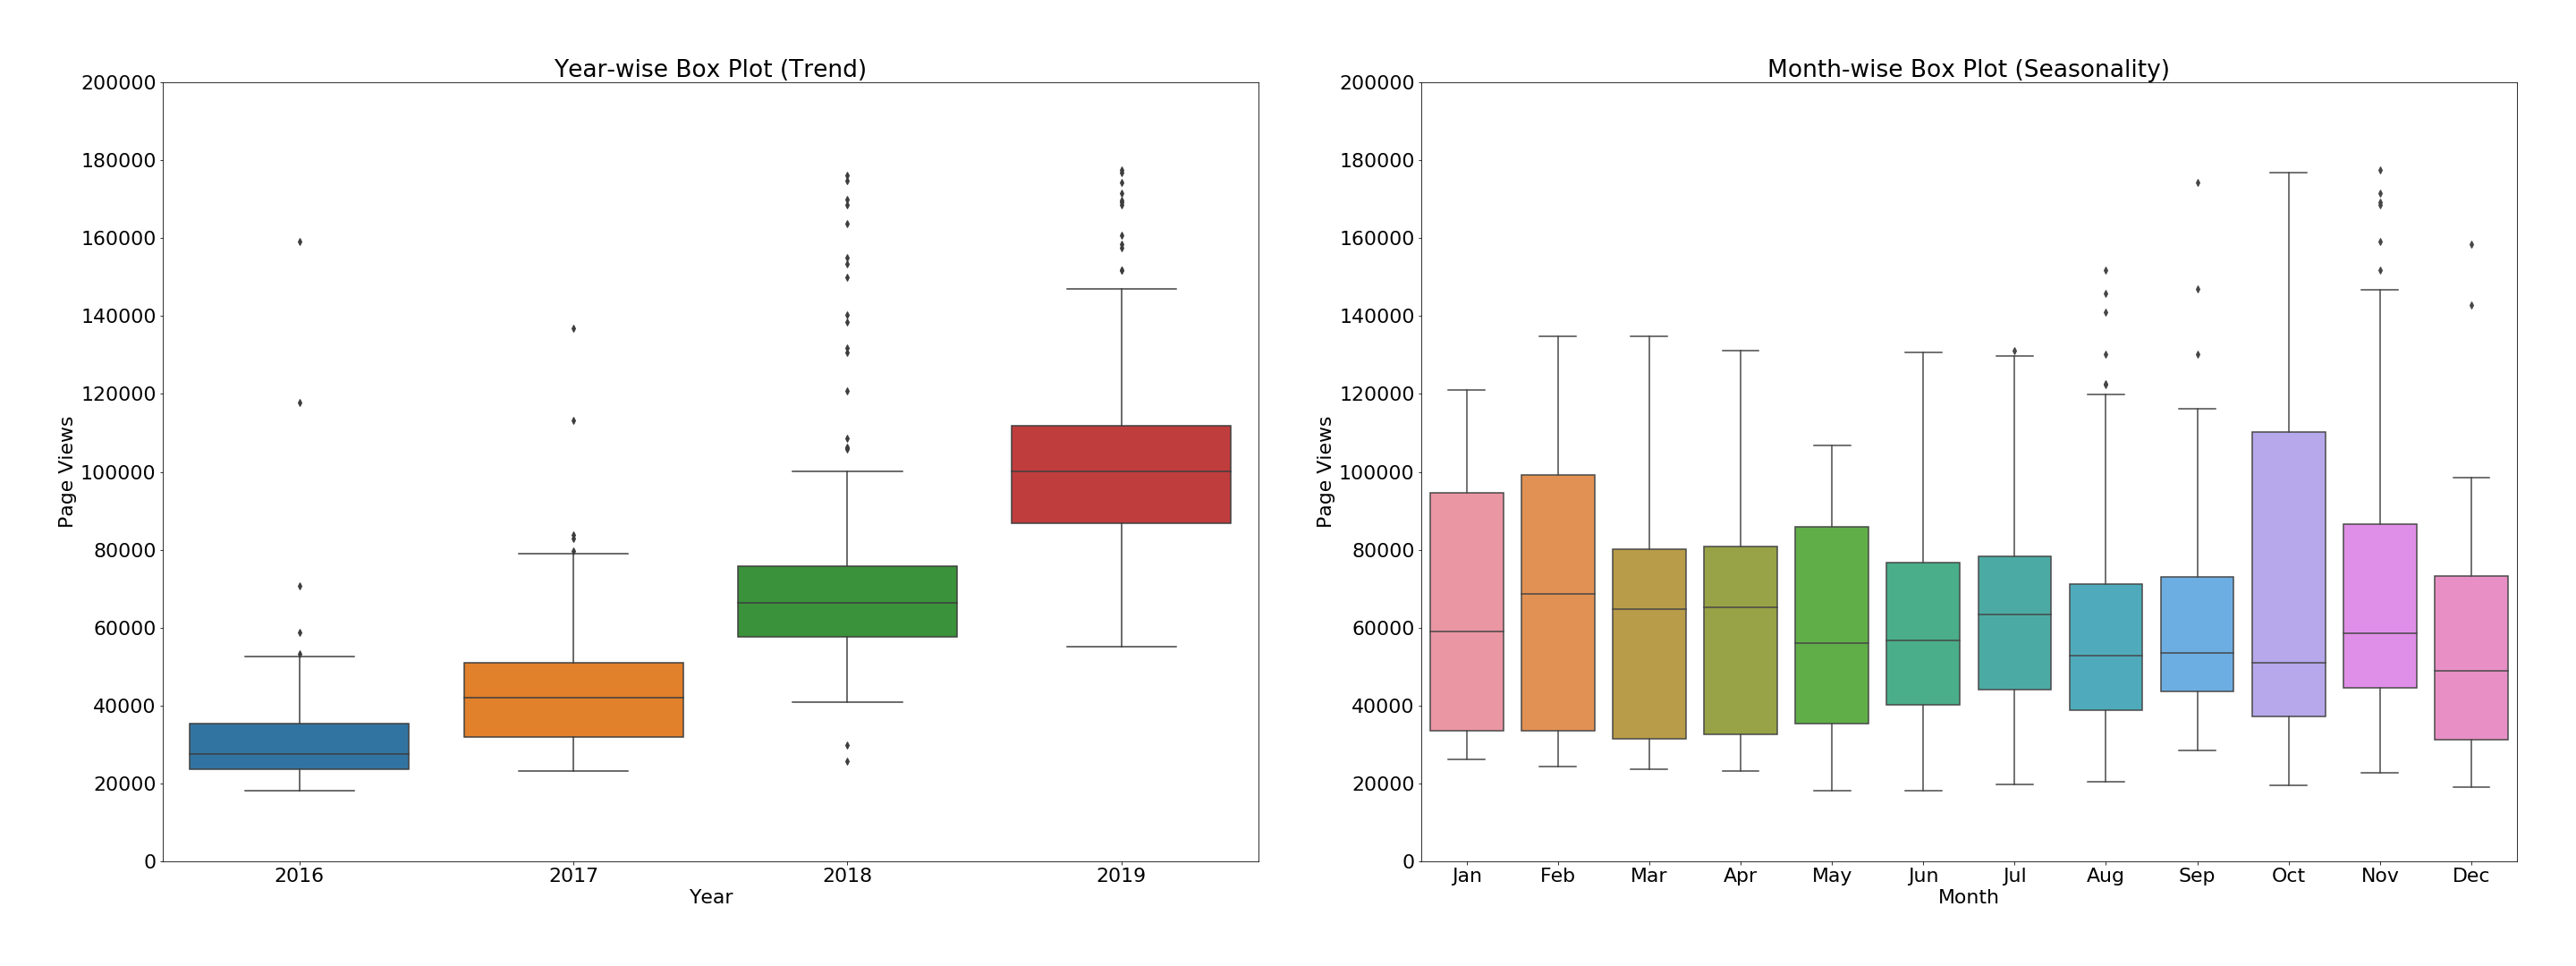

<hr/>

In [414]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv(r'C:\Users\Work\Desktop\Python Lessons\Data Science\Data Science w Py Course\Data For Use\fcc-forum-pageviews.csv',parse_dates=['date'],index_col=['date'])
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


<hr/>

<h3>1. Gaining Insights Into The Data</h3>



In [364]:
#Getting dataset volume: 
df.shape

(1304, 1)

In [365]:
#Checking for null values: 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


<hr/>

<h3>2. Cleaning The Data</h3>

* Set the index to the "date" column.
* Filter out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.



In [366]:
df.head(1)

,value
date,
2016-05-09,1201


In [415]:
#Filtering out dates: 
df[
    (df.value <= df.value.quantile(.975)) &
     (df.value >= df.value.quantile(.025))
]

dfc = df.copy()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


<blockquote><b>NOTE:</b> This raised a <i>TypeError</i> during testing. This is due to copying and modifying of the original dataframe during the bar plot section. 

A simple fix is to make a copy of the original dataframe immediately after you clean the data. In my code above, I simply did:</blockquote>

```python
dfc = df.copy()
```
    

<h3>3. Analyzing Relationships Between Data Points</h3>

* Create a Line Plot, Bar Plot, and Box Plot

<hr/>

<h3>a. Line Plotting</h3>

Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png".
* The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019".
* The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

In [408]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


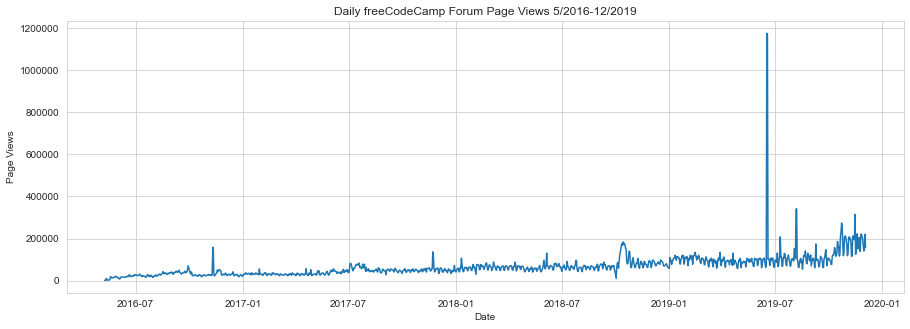

In [416]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(df.index, df.value)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.ticklabel_format(style='plain', axis='y')



<ins><b>Analysis</b></ins>:

<h3>b. Bar Plotting</h3>

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png".
* It should show average daily page views for each month grouped by year.
* The legend should show month labels and have a title of "Months".
* On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [417]:
#Copy and modify for monthly bar plot
df_bar = dfc.copy()
dfc['month'] = df.index.month
dfc['year'] = df.index.year


In [418]:
df_bar.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [420]:
#Group levels
df_bar = dfc.groupby(['year', 'month'])['value'].mean()

In [421]:
#Pivot index levels
df_bar = df_bar.unstack()

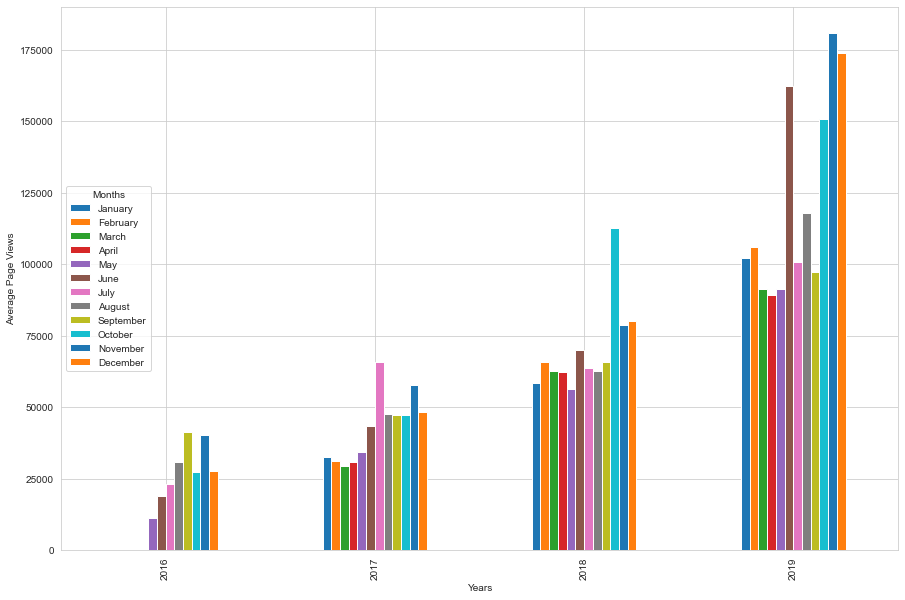

In [422]:
# Draw bar plot
fig = df_bar.plot(kind ="bar", legend = True, figsize = (15,10)).figure
plt.xlabel("Years")
plt.ylabel("Average Page Views")

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(fontsize = 10,
           title="Months", loc='center left', labels = [
               'January', 'February', 'March', 'April', 
               'May', 'June', 'July', 'August', 
               'September', 'October', 'November', 'December'])

<h3>c. Adjacent Box Plotting</h3>

Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png".
* These box plots should show how the values are distributed within a given year or month and how it compares over time.
* The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)".
* Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

In [430]:
#Prepare Data For Box Plots:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box.head()

,date,value,month,year
0,2016-05-09,1201,May,2016
1,2016-05-10,2329,May,2016
2,2016-05-11,1716,May,2016
3,2016-05-12,10539,May,2016
4,2016-05-13,6933,May,2016


In [431]:
#Set months to show on x-label in order:
df_box['mInt'] = df_box['date'].dt.month
df_box = df_box.sort_values('mInt')

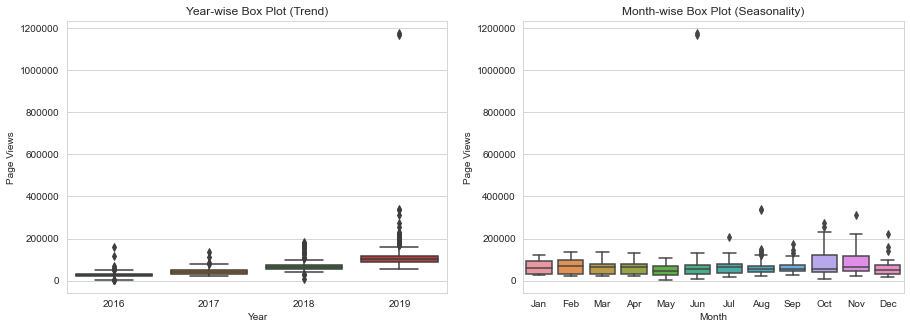

In [432]:
# Draw box plots (using Seaborn):
fig, (a,b) = plt.subplots(1,2,figsize=(15,5))

a = sns.boxplot(x=df_box.year, y=df_box.value, ax=a)
a.set_title('Year-wise Box Plot (Trend)')
a.set_xlabel('Year')
a.set_ylabel('Page Views')
a.ticklabel_format(axis='y', style='plain')


b = sns.boxplot(x=df_box.month, y=df_box.value, ax=b)
b.set_title('Month-wise Box Plot (Seasonality)')
b.set_xlabel('Month')
b.set_ylabel('Page Views')
b.ticklabel_format(axis='y', style='plain')

